Fetterer, F., Knowles, K., Meier, W. N., Savoie, M. & Windnagel, A. K. (2017). Sea Ice Index. (G02135, Version 3). [Data Set]. Boulder, Colorado USA. National Snow and Ice Data Center. https://doi.org/10.7265/N5K072F8. September Ice Extent. Date Accessed 11-19-2024.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Ice data from the NSIDC Sea Ice Index
ice_data = pd.read_csv('N_09_extent_v3.0.csv')
ice_data.head(1) #area in M/km^2

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,year,mo,data-type,region,extent,area
0,1979,9,Goddard,N,7.05,4.58


In [ ]:
arctic_area = 14.06 #million km^2. From Encyclopedia Britanicca
ice_data['arctic'] = ice_data['area']/arctic_area #percent of the Arctic Ocean that is cvered in sea ice
ice_data.head()

,year,mo,data-type,region,extent,area,arctic
0,1979,9,Goddard,N,7.05,4.58,0.325747
1,1980,9,Goddard,N,7.67,4.87,0.346373
2,1981,9,Goddard,N,7.14,4.44,0.315789
3,1982,9,Goddard,N,7.30,4.43,0.315078
4,1983,9,Goddard,N,7.39,4.70,0.334282


In [ ]:
#Compute linear and second order polynomial trends

trend1 = np.polyfit(ice_data['year'], ice_data['arctic'], 1)
trend2 = np.polyfit(ice_data['year'], ice_data['arctic'], 2)
trendline1 = np.poly1d(trend1)
trendline2 = np.poly1d(trend2)

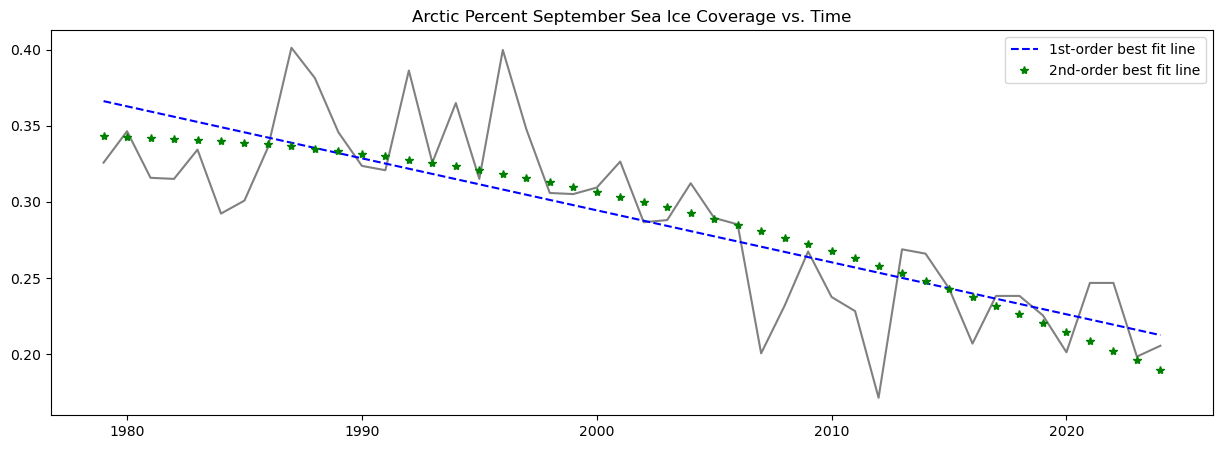

In [8]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(ice_data['year'], ice_data['arctic'], '-', color='gray')
ax.plot(ice_data['year'], trendline1(ice_data['year']), '--', color='blue', label='1st-order best fit line')
ax.plot(ice_data['year'], trendline2(ice_data['year']), '*', color='green', label='2nd-order best fit line')
ax.set_title('Arctic Percent September Sea Ice Coverage vs. Time')
ax.legend()

Export values to csv for easier analysis later

In [ ]:
perc_values = ice_data.drop(['data-type','region','extent','area'], axis=1)
perc_values = perc_values.set_index('year')

perc_values.head()

In [ ]:
perc_values.to_csv('perc_coverage_data.csv')